In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import pandas as pd
import os
project_folder_path = '/content/drive/MyDrive/Kool/sissejuhatus_andmeteadusesse/projekt/Project_C4'
df_train = pd.read_csv(os.path.join(project_folder_path, "df_train.csv"))
df_test = pd.read_csv(os.path.join(project_folder_path, "df_test.csv"))

season_map = {
    "Winter": 0,
    "Spring": 1,
    "Summer": 2,
    "Fall":   3
}

df_train['season'] = df_train['season'].map(season_map)
df_test['season']  = df_test['season'].map(season_map)

In [ ]:
df_train.head()

,date,trips,median_duration,tavg,prcp,wspd,day_name,day_of_week,is_weekend,season
0,2013-06-01,8691,867,28.1,0.0,17.1,Saturday,5,1,1
1,2013-06-02,15942,813,27.8,0.0,21.1,Sunday,6,1,1
2,2013-06-03,7585,692,23.6,44.6,13.2,Monday,0,0,1
3,2013-06-04,15692,832,20.2,0.0,19.5,Tuesday,1,0,1
4,2013-06-05,15632,797,19.0,0.0,14.2,Wednesday,2,0,1


In [ ]:
df_test.head()

,date,trips,median_duration,tavg,prcp,wspd,day_name,day_of_week,is_weekend,season
0,2020-01-01,18160,542,4.4,0.0,17.9,Wednesday,2,0,0
1,2020-01-02,41614,551,3.7,0.9,12.6,Thursday,3,0,0
2,2020-01-03,31920,522,7.5,3.0,8.8,Friday,4,0,0
3,2020-01-04,29480,526,8.2,4.5,6.5,Saturday,5,1,0
4,2020-01-05,27636,500,5.7,0.3,7.4,Sunday,6,1,0


# Features

In [ ]:
# Month and Day-of-Year
df_train['month'] = pd.to_datetime(df_train['date']).dt.month
df_test['month'] = pd.to_datetime(df_test['date']).dt.month

df_train['day_of_year'] = pd.to_datetime(df_train['date']).dt.dayofyear
df_test['day_of_year'] = pd.to_datetime(df_test['date']).dt.dayofyear

# Interaction features
df_train['temp_x_weekend'] = df_train['tavg'] * df_train['is_weekend']
df_test['temp_x_weekend'] = df_test['tavg'] * df_test['is_weekend']

df_train['rain_x_season'] = df_train['prcp'] * df_train['season']
df_test['rain_x_season'] = df_test['prcp'] * df_test['season']

df_train['wind_x_season'] = df_train['wspd'] * df_train['season']
df_test['wind_x_season'] = df_test['wspd'] * df_test['season']

df_train['temp_x_season'] = df_train['tavg'] * df_train['season']
df_test['temp_x_season'] = df_test['tavg'] * df_test['season']

df_train['month_x_temp'] = df_train['month'] * df_train['tavg']
df_test['month_x_temp'] = df_test['month'] * df_test['tavg']

# Polynomial weather features
df_train['tavg2'] = df_train['tavg'] ** 2
df_test['tavg2'] = df_test['tavg'] ** 2

df_train['prcp2'] = df_train['prcp'] ** 2
df_test['prcp2'] = df_test['prcp'] ** 2

df_train['wspd2'] = df_train['wspd'] ** 2
df_test['wspd2'] = df_test['wspd'] ** 2

# Trend shift
df_train['trend'] = range(len(df_train))
df_test['trend'] = range(len(df_train), len(df_train) + len(df_test))

# Lag features
df_train['lag_1'] = df_train['trips'].shift(1)
df_train['lag_7'] = df_train['trips'].shift(7)

df_test['lag_1'] = df_test['trips'].shift(1)
df_test['lag_7'] = df_test['trips'].shift(7)

# Rolling averages
df_train['rolling_7'] = df_train['trips'].rolling(7).mean()
df_test['rolling_7'] = df_test['trips'].rolling(7).mean()

# Cleaning it
# After creating lag_1, lag_7, rolling_7
df_train = df_train.dropna().reset_index(drop=True)
df_test  = df_test.dropna().reset_index(drop=True)

# Define features — all numeric already
features = [
    'median_duration',
    'tavg', 'tavg2',
    'prcp', 'prcp2',
    'wspd', 'wspd2',
    'day_of_week',
    'is_weekend',
    'season',
    'temp_x_weekend',
    'rain_x_season',
    'wind_x_season',
    'temp_x_season',
    'trend',
    'month', 'day_of_year',
    'lag_1', 'lag_7', 'rolling_7',
    'month_x_temp'
]

# Extract features
X_train = df_train[features]
X_test = df_test[features]

y_train = df_train['trips']
y_test = df_test['trips']

# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
preds = model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, preds)
rmse = np.sqrt(mean_squared_error(y_test, preds))
r2 = r2_score(y_test, preds)

mae, rmse, r2


(12392.736630283793, np.float64(16310.695440185344), 0.7693445248441058)

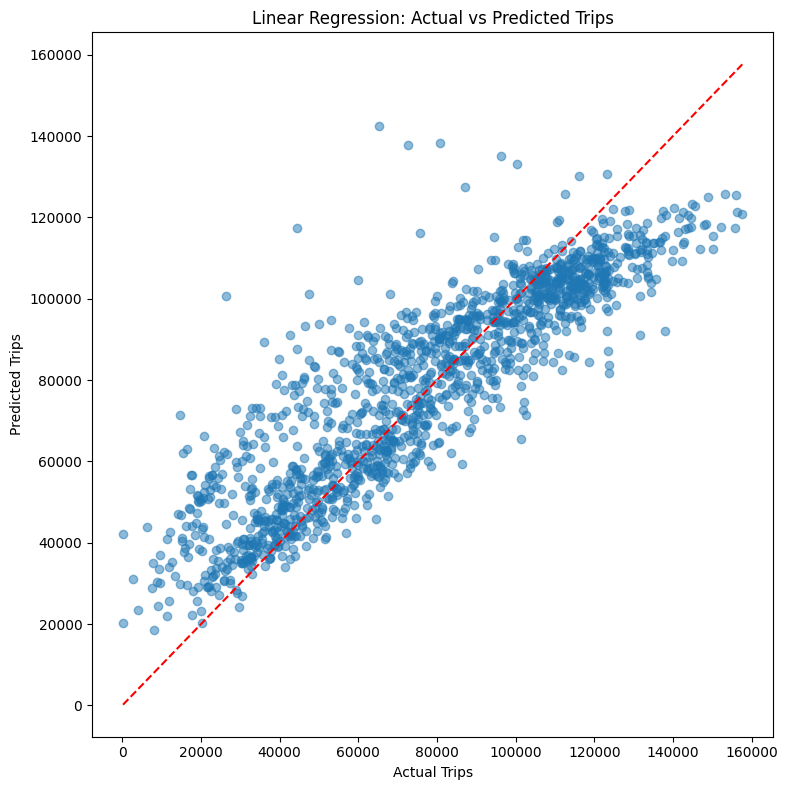

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.scatter(y_test, preds, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

plt.xlabel("Actual Trips")
plt.ylabel("Predicted Trips")
plt.title("Linear Regression: Actual vs Predicted Trips")
plt.tight_layout()

plt.savefig('linear.png', format='png', bbox_inches='tight')
plt.show()



## We examined the linear model coefficients to understand which features most strongly influence bike demand. The absolute values of coefficients indicate the strength of the effect.

## Graph coefficients

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

coef_df = pd.DataFrame({
    'feature': features,
    'standardized_coef': lr.coef_,
    'abs_coef': np.abs(lr.coef_)
}).sort_values('abs_coef', ascending=False)

coef_df


,feature,standardized_coef,abs_coef
19,rolling_7,11040.271290,11040.271290
3,prcp,-4868.607414,4868.607414
0,median_duration,4414.478191,4414.478191
14,trend,3516.007950,3516.007950
16,day_of_year,-3405.169641,3405.169641
8,is_weekend,-3318.496684,3318.496684
1,tavg,2989.397327,2989.397327
2,tavg2,-2673.928470,2673.928470
4,prcp2,2301.820953,2301.820953
15,month,1997.501979,1997.501979


/tmp/ipython-input-465571879.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-465571879.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


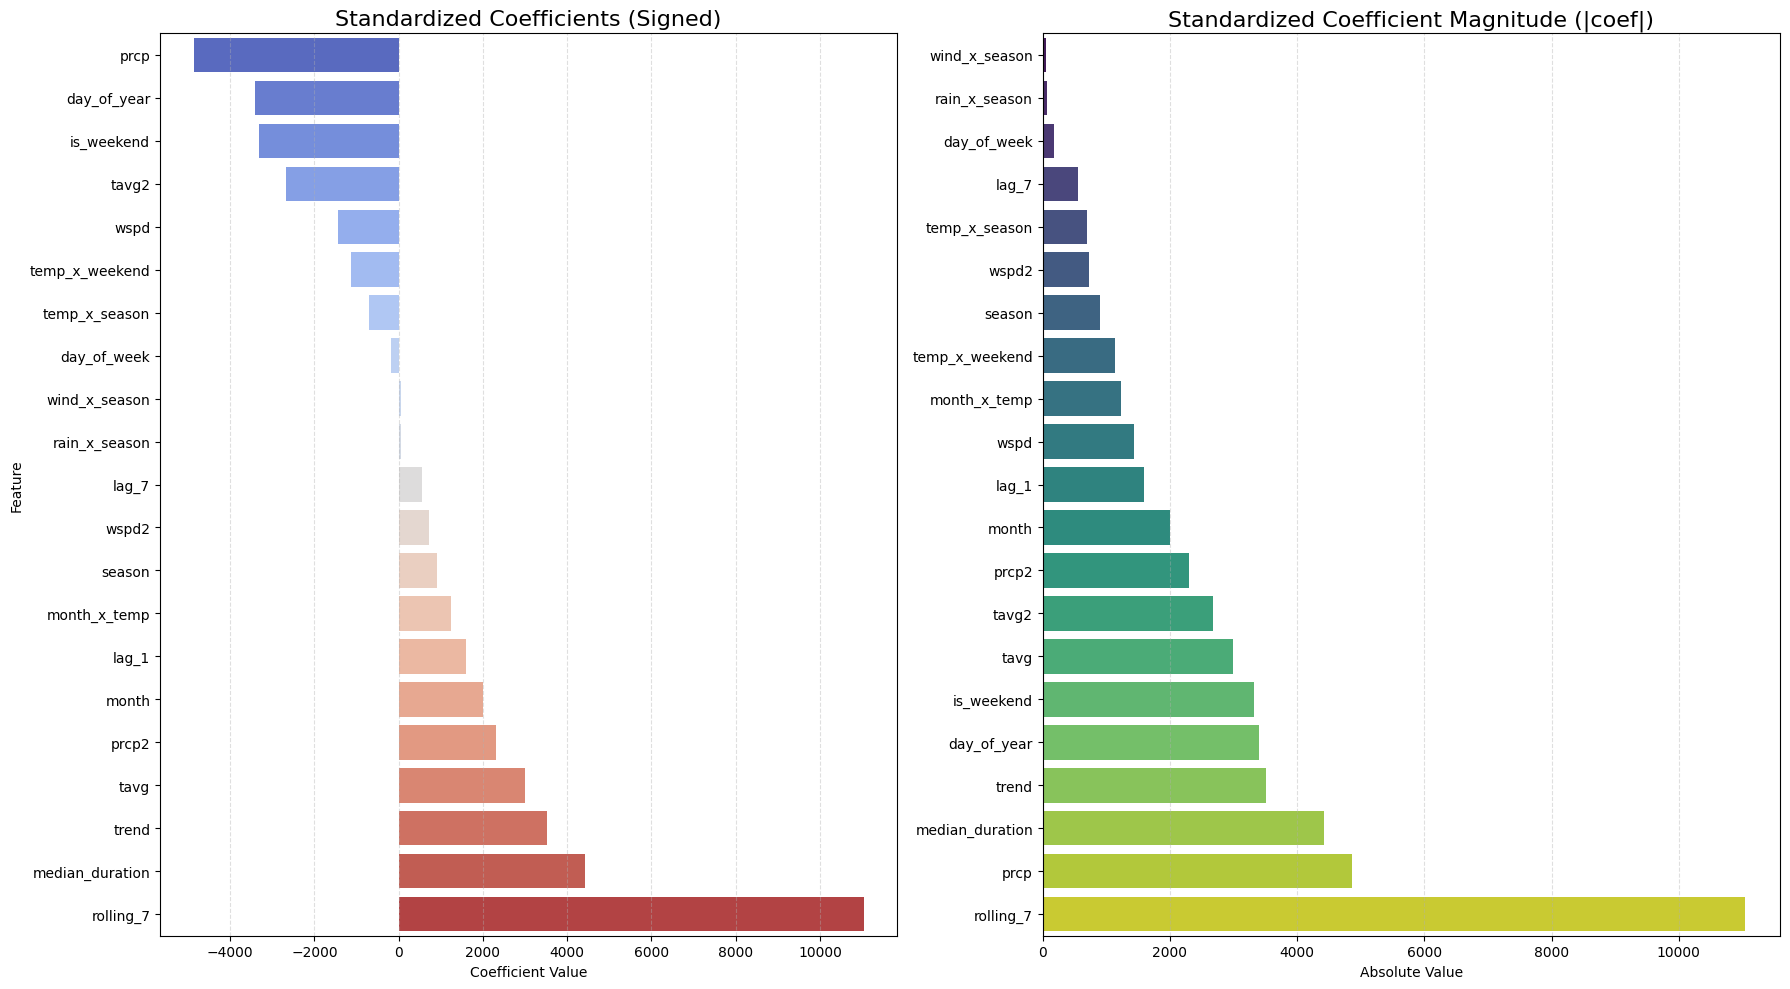

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort for plotting (signed and magnitude)
coef_signed = coef_df.sort_values('standardized_coef', ascending=True)
coef_mag = coef_df.sort_values('abs_coef', ascending=True)

fig, axes = plt.subplots(1, 2, figsize=(18, 10))

# --- LEFT: Signed Standardized Coefficients ---
sns.barplot(
    data=coef_signed,
    x='standardized_coef',
    y='feature',
    palette='coolwarm',
    ax=axes[0]
)
axes[0].set_title("Standardized Coefficients (Signed)", fontsize=16)
axes[0].set_xlabel("Coefficient Value")
axes[0].set_ylabel("Feature")
axes[0].grid(axis='x', linestyle='--', alpha=0.4)

# --- RIGHT: Absolute Magnitude ---
sns.barplot(
    data=coef_mag,
    x='abs_coef',
    y='feature',
    palette='viridis',
    ax=axes[1]
)
axes[1].set_title("Standardized Coefficient Magnitude (|coef|)", fontsize=16)
axes[1].set_xlabel("Absolute Value")
axes[1].set_ylabel("")
axes[1].grid(axis='x', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.savefig('coefficients_linear.png', format='png', bbox_inches='tight')
plt.show()




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Interpretation of Linear Regression Coefficients

To better understand how different factors influence Citi Bike ridership, we examined the coefficients of the final linear regression model. Figure~\ref{tab:linreg_coeffs} and the associated bar plots show both the signed coefficients and their absolute magnitudes. The coefficient signs indicate whether a feature increases or decreases predicted trips, while the absolute values represent relative importance.

The most influential predictor was is_weekend, with a coefficient of approximately –7342, indicating that weekends generally reduce ridership compared to weekdays when controlling for weather, season, and temporal trends. This matches winter and fall behavior but also highlights a limitation of linear regression, which cannot capture the nonlinear reversal where summer weekends show higher demand.

Seasonal indicators such as season and month had positive coefficients, reflecting higher ridership during warmer months. Weather features also behaved as expected: precipitation and wind speed were associated with lower ridership, while temperature had a positive effect. Several interaction and polynomial features (e.g., tavg2, temp_x_season) captured additional nonlinearity but had smaller magnitudes. Lag features (lag_1, lag_7) and rolling averages (rolling_7) contributed to temporal smoothing, improving predictive performance.

Overall, the coefficient patterns are consistent with real-world behavior of bike-share usage and demonstrate that the engineered features help the linear model capture important seasonal, weather-related, and temporal effects.

In [ ]:
print(df_test[['date']].head())
print(df_test[['date']].tail())


         date
0  2020-01-08
1  2020-01-09
2  2020-01-10
3  2020-01-11
4  2020-01-12
            date
1448  2023-12-27
1449  2023-12-28
1450  2023-12-29
1451  2023-12-30
1452  2023-12-31


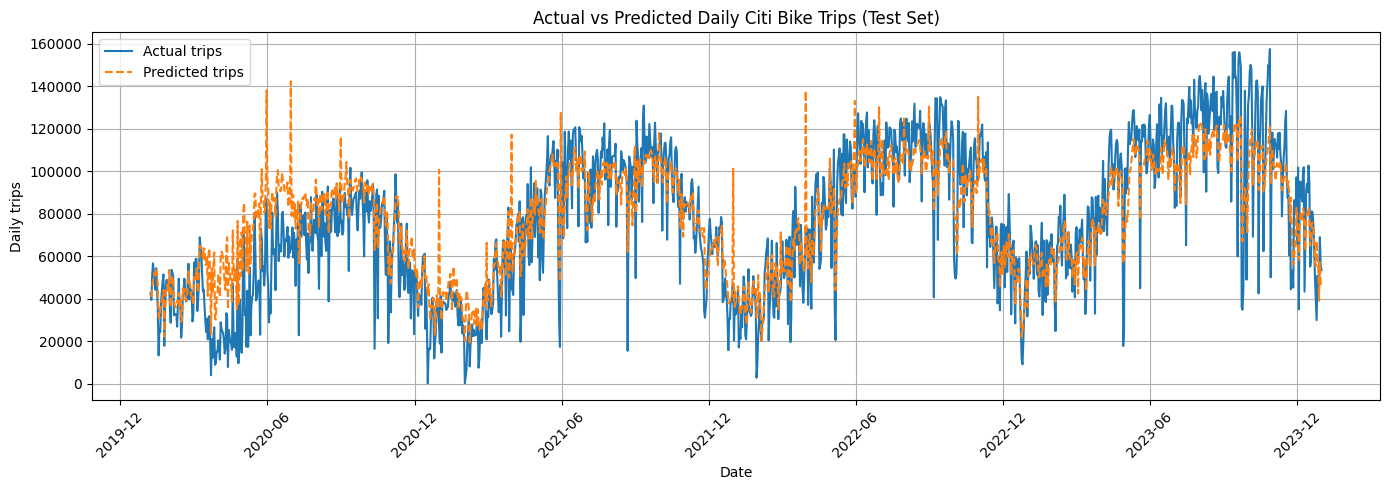

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

df_test['date'] = pd.to_datetime(df_test['date'])

# Build a DataFrame for plotting
plot_df = pd.DataFrame({
    'date': df_test['date'],
    'actual_trips': y_test,
    'predicted_trips': preds
}).sort_values('date')

fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(plot_df['date'], plot_df['actual_trips'], label='Actual trips')
ax.plot(plot_df['date'], plot_df['predicted_trips'], label='Predicted trips', linestyle='--')

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))  # tick every 3 months
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Daily trips')
plt.title('Actual vs Predicted Daily Citi Bike Trips (Test Set)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('ActualvsPredicted.png', format='png', bbox_inches='tight')
plt.show()




In [ ]:
print(plot_df['date'].dtype)


datetime64[ns]


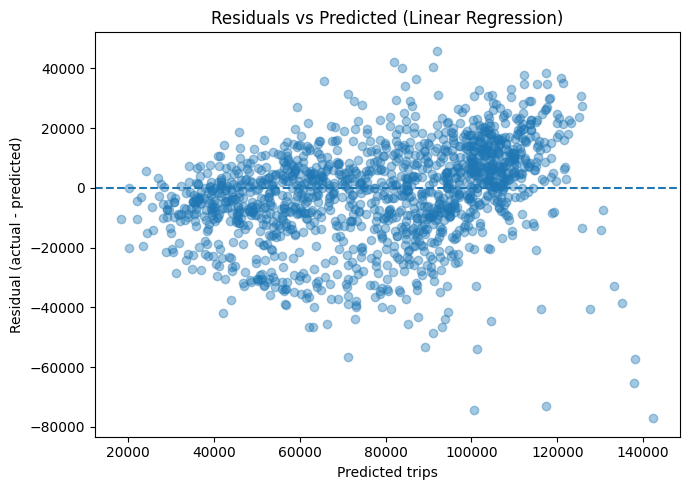

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

residuals = y_test - preds

plt.figure(figsize=(7, 5))
plt.scatter(preds, residuals, alpha=0.4)
plt.axhline(0, linestyle='--')

plt.xlabel('Predicted trips')
plt.ylabel('Residual (actual - predicted)')
plt.title('Residuals vs Predicted (Linear Regression)')
plt.tight_layout()
plt.savefig('residuals.png', format='png', bbox_inches='tight')
plt.show()





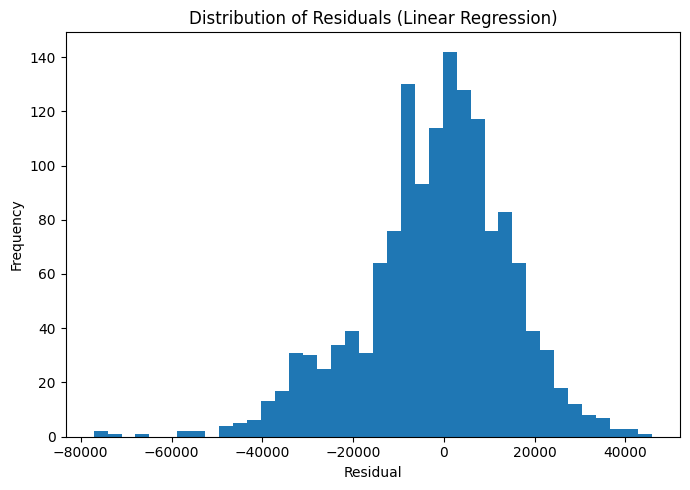

In [ ]:
plt.figure(figsize=(7, 5))
plt.hist(residuals, bins=40)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals (Linear Regression)')
plt.tight_layout()
plt.savefig('residual_distro.png', format='png', bbox_inches='tight')
plt.show()



